Import packages that are needed

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd
import os
import h5py
from google.colab import drive
import astropy.time as at
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings

warnings.filterwarnings('ignore')


Mount drive for reading and writing files

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


Use time for gw1 events since they don't have times associated with them in the dataset. This code lets us get the geocentric time for the event we are looking at.

In [ ]:
times=at.Time(['2015-09-14 09:50:45.000','2015-10-12 09:54:43','2015-12-26 03:38:53','2017-01-04 10:11:58','2017-06-08 02:01:16','2017-07-29 18:56:29','2017-08-09 08:28:21','2017-08-14 10:30:43','2017-08-17 12:41:04','2017-08-18 02:25:09','2017-08-23 13:13:58'],scale='utc',format='iso')

tcgtimes=times.tcg
tcgtimes.format='gps'

print(tcgtimes.tcg)
tcgtimes.value
print(tcgtimes[0])
1*int(tcgtimes.value[0])

[1.12625946e+09 1.12867890e+09 1.13513635e+09 1.16755994e+09
 1.18092249e+09 1.18538981e+09 1.18630252e+09 1.18674186e+09
 1.18700888e+09 1.18705833e+09 1.18752926e+09]
1126259462.0


1126259462

Read file for each event. Save all ras, decs, and times. Create a weight that is 1/length of the dataset. This will be used for weighting when creating contours. Then add this to a big array that keeps track of all data. Finally, create a dataframe of all data.

In [ ]:
ras=np.array([])
decs=np.array([])
times=np.array([])
weights=np.array([])

ii=0

for file in os.listdir('/content/drive/MyDrive/PHYS 549/gwc1/'):
  print(file)
  f=h5py.File('/content/drive/MyDrive/PHYS 549/gwc1/' + file)
  try:
   #print('try')
   ra=f['IMRPhenomPv2_posterior']['right_ascension']
   dec=f['IMRPhenomPv2_posterior']['declination']
   ras=np.concatenate([ras,ra])
   decs=np.concatenate([decs,dec])
   weight=np.ones_like(ra)/len(ra)
   weights=np.concatenate([weights,weight])
   #print(ra)
   time=np.ones_like(ra)*int(tcgtimes.value[ii])
   times=np.concatenate([times,time])
   ii+=1
   #print('donewithtry')
   #print(ras,decs)
   #print('done with ' + str(file))
  except:
    ra=f['IMRPhenomPv2NRT_highSpin_posterior']['right_ascension']
    dec=f['IMRPhenomPv2NRT_highSpin_posterior']['declination']
    ras=np.concatenate([ras,ra])
    decs=np.concatenate([decs,dec])
    weight=np.ones_like(ra)/len(ra)
    weights=np.concatenate([weights,weight])
    time=np.ones_like(ra)*int(tcgtimes.value[ii])
    times=np.concatenate([times,time])
    ii+=1
    continue
print(ras)
print(decs)

dftotal=pd.DataFrame({'ra':ras,'dec':decs,'times':times,'weights':weights})#'time':times,


GW150914_GWTC-1.hdf5
GW151012_GWTC-1.hdf5
GW151226_GWTC-1.hdf5
GW170104_GWTC-1.hdf5
GW170608_GWTC-1.hdf5
GW170729_GWTC-1.hdf5
GW170809_GWTC-1.hdf5
GW170814_GWTC-1.hdf5
GW170817_GWTC-1.hdf5
GW170818_GWTC-1.hdf5
GW170823_GWTC-1.hdf5
[1.89186709 1.25434197 1.66678665 ... 4.45694523 1.39109937 4.39120919]
[-1.25074378 -1.22804175 -1.27966771 ... -0.63926699  1.0217857
 -0.56302178]


Make sure keys are good and the data worked.

In [ ]:
print(dftotal)

              ra       dec         times   weights
0       1.891867 -1.250744  1.126259e+09  0.000024
1       1.254342 -1.228042  1.126259e+09  0.000024
2       1.666787 -1.279668  1.126259e+09  0.000024
3       1.863250 -1.261367  1.126259e+09  0.000024
4       0.994238 -1.036272  1.126259e+09  0.000024
...          ...       ...           ...       ...
439998  4.406384 -0.498295  1.187529e+09  0.000018
439999  4.309555 -0.400908  1.187529e+09  0.000018
440000  4.456945 -0.639267  1.187529e+09  0.000018
440001  1.391099  1.021786  1.187529e+09  0.000018
440002  4.391209 -0.563022  1.187529e+09  0.000018

[440003 rows x 4 columns]


Save data

In [ ]:
dftotal.to_csv('/content/drive/MyDrive/PHYS 549/GW1data.csv', index=False)

plot data to see what it looks like.

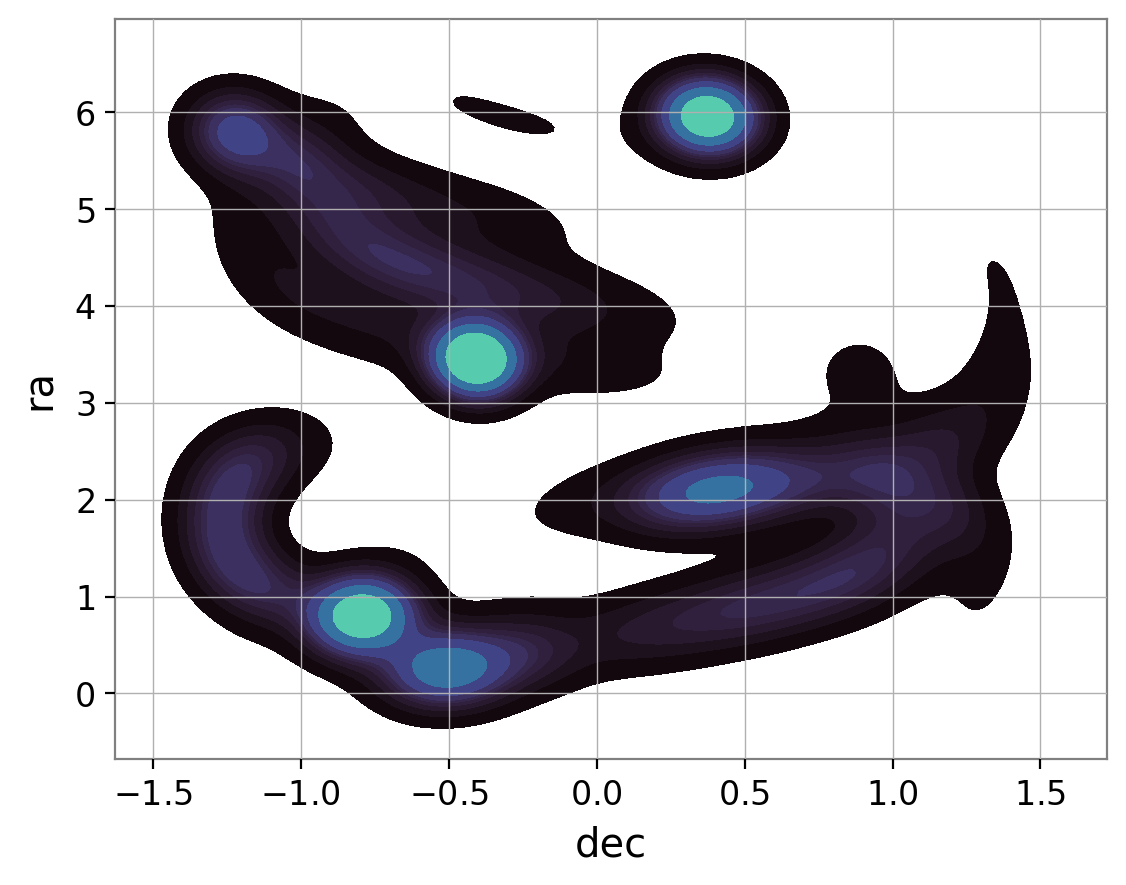

In [ ]:
sb.kdeplot(data=dftotal, x="dec", y="ra", cmap="mako",weights='weight',fill=True)
plt.show()

EVERYTHING BELOW THIS IS FIGURING OUT HOW TO READ THE FILES SINCE THESE FILES ARE IN A DIFFERENT STYLE THAN THE OTHER TWO OBSVERING RUNS.

In [ ]:
import h5py

In [ ]:
f=h5py.File('/content/drive/MyDrive/PHYS 549/gwc1/GW150914_GWTC-1.hdf5')

In [ ]:
print(f.keys())

<KeysViewHDF5 ['IMRPhenomPv2_posterior', 'Overall_posterior', 'SEOBNRv3_posterior', 'prior']>


In [ ]:
print(f['IMRPhenomPv2_posterior'].dtype)

[('costheta_jn', '<f8'), ('luminosity_distance_Mpc', '<f8'), ('right_ascension', '<f8'), ('declination', '<f8'), ('m1_detector_frame_Msun', '<f8'), ('m2_detector_frame_Msun', '<f8'), ('spin1', '<f8'), ('spin2', '<f8'), ('costilt1', '<f8'), ('costilt2', '<f8')]


In [ ]:
print(f['IMRPhenomPv2_posterior']['right_ascension'])
print(f['IMRPhenomPv2_posterior']['declination'])
ras=f['IMRPhenomPv2_posterior']['right_ascension']
decs=f['IMRPhenomPv2_posterior']['declination']

getdf={'dec':decs,'ra':ras}

df=pd.DataFrame(getdf)
print(df.keys())

[1.89186709 1.25434197 1.66678665 ... 1.90837566 2.01179872
 0.94808072]
[-1.25074378 -1.22804175 -1.27966771 ... -1.28823894 -1.26248191
 -1.03022082]
Index(['dec', 'ra'], dtype='object')


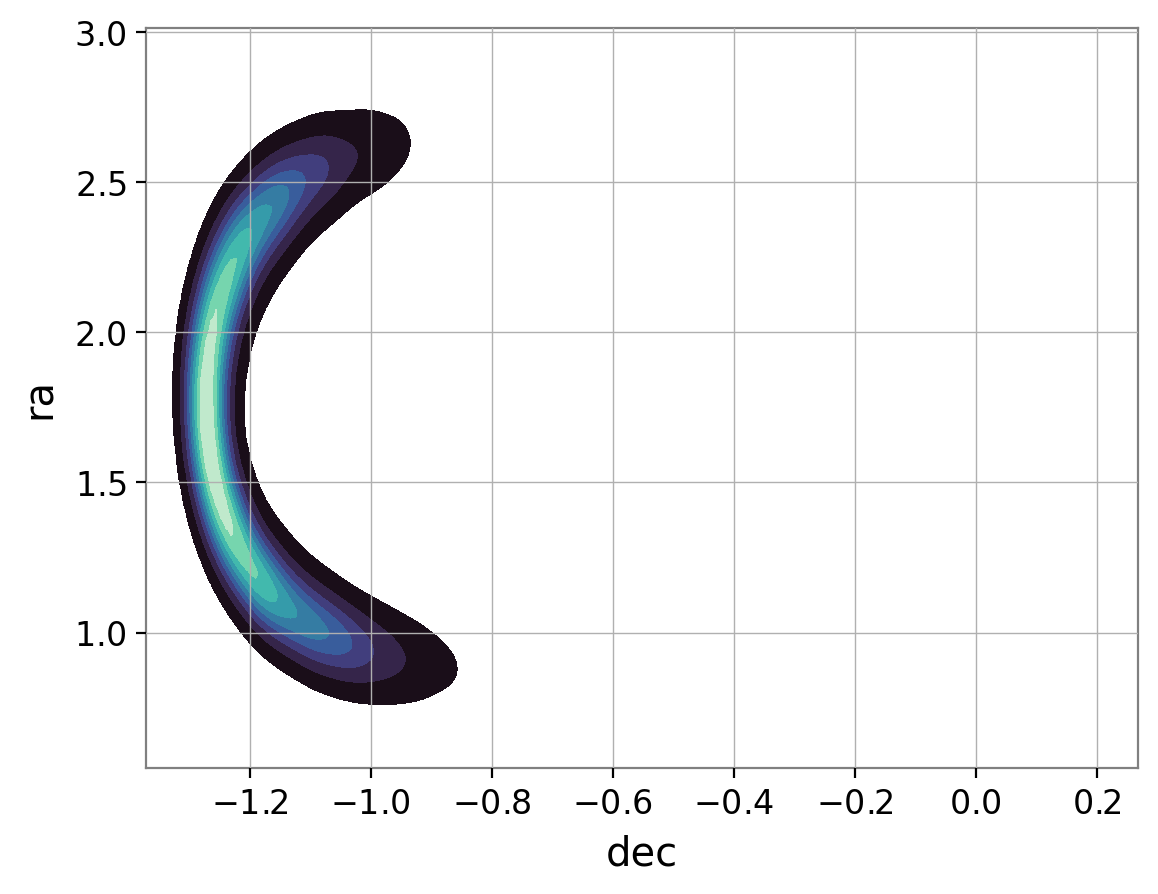

In [ ]:
sb.kdeplot(data=df, x="dec", y="ra", cmap="mako",fill=True)
plt.show()

TypeError: void() takes at least 1 positional argument (0 given)

In [ ]:
#GW170817_GWTC-1.hdf5

f=h5py.File('/content/drive/MyDrive/PHYS 549/gwc1/GW170817_GWTC-1.hdf5')
print(f.keys())
print(f['IMRPhenomPv2NRT_highSpin_posterior'].dtype)

<KeysViewHDF5 ['IMRPhenomPv2NRT_highSpin_posterior', 'IMRPhenomPv2NRT_highSpin_prior', 'IMRPhenomPv2NRT_lowSpin_posterior', 'IMRPhenomPv2NRT_lowSpin_prior']>
[('costheta_jn', '<f8'), ('luminosity_distance_Mpc', '<f8'), ('right_ascension', '<f8'), ('declination', '<f8'), ('m1_detector_frame_Msun', '<f8'), ('m2_detector_frame_Msun', '<f8'), ('lambda1', '<f8'), ('lambda2', '<f8'), ('spin1', '<f8'), ('spin2', '<f8'), ('costilt1', '<f8'), ('costilt2', '<f8')]
